In [1]:
from pytictoc import TicToc
import seaborn as sns
from sklearn import linear_model
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectKBest
from sklearn.preprocessing import StandardScaler, normalize

In [64]:
# Analyting y vector to detect most relevant features

In [2]:
df = pd.read_csv("data/vectorDF.csv")
df = df.drop('job_name', 1)
df = df.drop('maxPath', 1)
features = df.columns.to_list()
features_runtime_excluded = df.columns.to_list()
features_runtime_excluded.remove('rtime')


Text(0, 0.5, 'rtime')

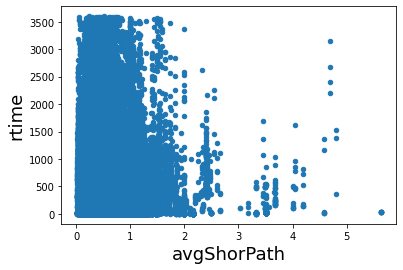

In [5]:
df.plot.scatter(x='avgShorPath', y='rtime')
plt.xlabel('avgShorPath', fontsize=18)
plt.ylabel('rtime', fontsize=18)

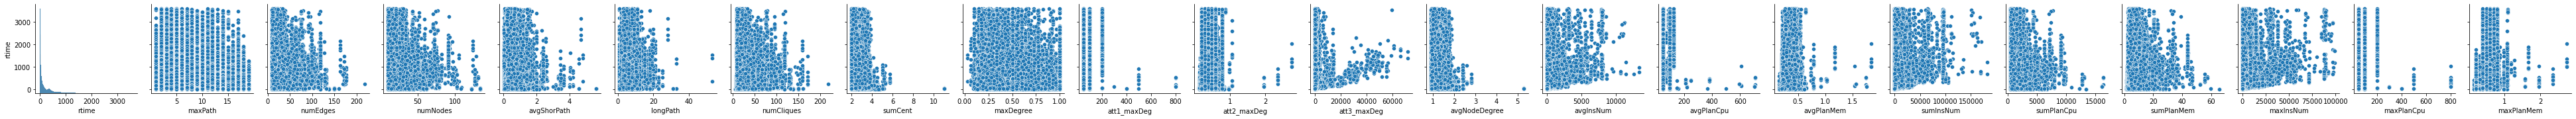

In [6]:
#visualization of different features with runtime
sns.pairplot(df, dropna=True, y_vars="rtime")

In [6]:
#train and test data definition
X = df.iloc[:, 1:21] 
Y = df.iloc[:, 0] 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0 )

In [7]:
X

,numEdges,numNodes,avgShorPath,longPath,numCliques,sumCent,maxDegree,att1_maxDeg,att2_maxDeg,att3_maxDeg,avgNodeDegree,avgInsNum,avgPlanCpu,avgPlanMem,sumInsNum,sumPlanCpu,sumPlanMem,maxInsNum,maxPlanCpu,maxPlanMem
0,9.0,10.0,0.244444,3.0,9.0,2.000000,0.444444,100.0,0.49,9.0,0.900000,73.599998,100.0,0.385000,736.0,1000.0,3.85,575.0,100.0,0.49
1,35.0,26.0,0.367692,6.0,33.0,2.800000,0.280000,50.0,0.20,1.0,1.346154,1.076923,50.0,0.200000,28.0,1300.0,5.20,3.0,50.0,0.20
2,18.0,14.0,0.247253,3.0,18.0,2.769231,0.461538,100.0,0.30,1.0,1.285714,1.428571,100.0,0.412857,20.0,1400.0,5.78,7.0,100.0,0.49
3,9.0,10.0,0.411111,3.0,9.0,2.000000,0.555556,100.0,0.30,5.0,0.900000,1.800000,100.0,0.345000,18.0,1000.0,3.45,5.0,100.0,0.39
4,10.0,11.0,0.718182,5.0,10.0,2.000000,0.300000,50.0,0.39,111.0,0.909091,80.181816,50.0,0.350000,882.0,550.0,3.85,334.0,50.0,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232804,16.0,17.0,0.525735,5.0,16.0,2.000000,0.312500,100.0,0.59,15.0,0.941176,3.588235,100.0,0.405882,61.0,1700.0,6.90,15.0,100.0,0.59
232805,12.0,11.0,1.090909,6.0,12.0,2.400000,0.300000,50.0,0.20,1.0,1.090909,17.909090,50.0,0.217273,197.0,550.0,2.39,111.0,50.0,0.39
232806,16.0,17.0,1.025735,9.0,16.0,2.000000,0.187500,50.0,0.30,5.0,0.941176,33.588234,50.0,0.312941,571.0,850.0,5.32,204.0,50.0,0.49
232807,15.0,16.0,1.062500,8.0,15.0,2.000000,0.266667,100.0,0.59,123.0,0.937500,36.000000,100.0,0.419375,576.0,1600.0,6.71,123.0,100.0,0.59


In [15]:
##feature selection with linear regression
regressor = LinearRegression()
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center=False) #center=True (the default) would not work ("ValueError: center=True only allowed for dense data") but should presumably work in general

featureSelector = SelectKBest(score_func = f_regression , k=7)
featureSelector.fit(X_train,Y_train)
featureFS = [x for _, x in sorted(zip(featureSelector.scores_, features),reverse=True)]


In [50]:
# feature extraction with RFE

model = LinearRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)

/home/alireza.alamgiralem/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Num Features: 1
Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False]
Feature Ranking: [12 11  5 13 14  2  4 15  6 20  1 17  9  7 18 16  8 19 10  3]


In [ ]:
featureRFE = [x for _, x in sorted(zip(featureSelector.scores_, features),reverse=True)]

In [32]:
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df)
df_normalized = normalize(df_scaled)

In [8]:
#feature selection with PCA
pca = PCA(n_components=1)
pca.fit(df)
pcas = pca.components_
featurePCA = [x for _, x in sorted(zip(list(abs(pca.components_).flatten()), features),reverse=True)]
pca_list = abs(pca.components_).flatten()
pca_list.tolist()
round_PCA = [round(num, 4) for num in pca_list]
round_PCA

[0.020914385421222516,
 0.00012218904644217663,
 0.00010659720303069478,
 8.548116347276993e-07,
 1.27018827805261e-05,
 0.00011715484483985938,
 2.9054914156435097e-07,
 1.989143534734413e-06,
 0.00037445367133822765,
 1.7318365460935504e-06,
 0.06631913796080263,
 2.3444539444186006e-07,
 0.051695913135092315,
 0.00034305879081867447,
 1.7048939766235454e-06,
 0.8245031572392723,
 0.015596919318153537,
 7.188641125269907e-05,
 0.558965757907249,
 0.0003886099195523784,
 2.1166415857115333e-06]

In [96]:
#feature selection with ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10, max_depth = 15)
model.fit(X, Y)
print(model.feature_importances_)
featureExTrCl = [x for _, x in sorted(zip(model.feature_importances_, features_runtime_excluded),reverse=True)]

[0.04566995 0.04289637 0.06267644 0.05008832 0.04111744 0.04113641
 0.07238597 0.01331421 0.03783686 0.05221378 0.04562115 0.10040133
 0.01280375 0.05972405 0.09585533 0.04376145 0.05367656 0.07068997
 0.0085526  0.04957807]


In [97]:
featureExTrCl

['avgInsNum',
 'sumInsNum',
 'maxDegree',
 'maxInsNum',
 'avgShorPath',
 'avgPlanMem',
 'sumPlanMem',
 'att3_maxDeg',
 'longPath',
 'maxPlanMem',
 'numEdges',
 'avgNodeDegree',
 'sumPlanCpu',
 'numNodes',
 'sumCent',
 'numCliques',
 'att2_maxDeg',
 'att1_maxDeg',
 'avgPlanCpu',
 'maxPlanCpu']

In [27]:
# feature extraction
k_best_model = SelectKBest(score_func = f_classif, k=4)
k_best = k_best_model.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
feature_k_best = [x for _, x in sorted(zip(k_best.scores_, features),reverse=True)]


In [38]:
finalFeatures = featureExTrCl[0:5] + featurePCA[0:5] + featureRFE[0:5]

In [39]:
finalFeatures

['sumInsNum',
 'avgInsNum',
 'maxInsNum',
 'avgShorPath',
 'avgPlanMem',
 'sumPlanCpu',
 'maxPlanCpu',
 'avgNodeDegree',
 'avgPlanCpu',
 'maxPath',
 'att3_maxDeg',
 'maxInsNum',
 'sumInsNum',
 'avgInsNum',
 'sumPlanCpu']

In [40]:
finaFeatures = set(finalFeatures)

In [41]:
finaFeatures

{'att3_maxDeg',
 'avgInsNum',
 'avgNodeDegree',
 'avgPlanCpu',
 'avgPlanMem',
 'avgShorPath',
 'maxInsNum',
 'maxPath',
 'maxPlanCpu',
 'sumInsNum',
 'sumPlanCpu'}